# Exploratory Data Analysis - The Grammy Awards Dataset
A fundamental part of this work is to identify the type of data and all the characteristics they have. In this way it will be possible to identify which transformations are necessary to perform in a next process, these transformations are not directly in this EDA, here are some processes to perform the transformations and a small visualization of how the data would look like and thus effectively create the Data Pipeline.

The environment variables are loaded from a `.env` file. The main goal is to manage the configuration, and the `WORK_PATH` environment variable is used to define a working directory.

In [1]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
work_path = os.getenv('WORK_PATH')

sys.path.append(work_path)

In [7]:
import pandas as pd
import re
import seaborn as sns
from matplotlib import pyplot as plt
from sqlalchemy.orm import aliased, sessionmaker
from src.database.connection import config_loader
from src.models.models import Grammys
from sqlalchemy import Table, MetaData, select

A connection to a database is established using `connection` and a SQLAlchemy session is created using `sessionmaker` linked to that connection. This streamlines database operations in the program.

In [4]:
connection = config_loader()

Session = sessionmaker(bind=config_loader)
session = Session()


INFO:root:Connected successfully to Workshop-2 database


Using SQLAlchemy, a query is made to the `(Grammys)` table, along with an alias `table`, to read and load the data into a DataFrame.
 

In [8]:
metadata = MetaData()
table = Table('grammys', metadata, autoload=True, autoload_with=connection)

select_stmt = select([table])
result_proxy = connection.execute(select_stmt)
results = result_proxy.fetchall()
column_names = table.columns.keys()
df = pd.DataFrame(results, columns=column_names)

/tmp/ipykernel_7292/1181067269.py:2: RemovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  table = Table('grammys', metadata, autoload=True, autoload_with=connection)


In [9]:
df.head(5)

,id,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,5,2019,62nd Annual GRAMMY Awards (2019),2020-05-19,2020-05-19,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


### Columns

In [10]:
df.columns

Index(['id', 'year', 'title', 'published_at', 'updated_at', 'category',
       'nominee', 'artist', 'workers', 'img', 'winner'],
      dtype='object')

##### Description of columns
- ***id:*** Unique identifier for each entry in the dataset. This is not included in the original dataset, but was added as an ID at the time of loading into the database.
- ***year:*** The year in which the Grammy Awards ceremony took place.
- ***title:*** Title of the Grammy Awards ceremony, including the year.
- ***published_at:*** Date and time the record was published.
- ***updated_at:*** Date and year the record was updated.
- ***category:*** The category in which the nomination falls.
- ***nominee:*** Song, Album or Artist nominated.
- ***artist:*** The name of the artist associated with the nomination.
- ***workers:*** People involved in the production of the nominated song or album, such as producers, sound engineers, etc.
- ***img:*** URL of the image associated with the nomination.
- ***winner:*** Boolean indicator that shows whether the nomination was a winner (True) or not (False).

*At the end of this notebook is the reference to the dataset, but in this case this description of the columns is your own.*

Count of rows and columns to know how much data there are

In [6]:
num_rows, num_columns = df.shape
print(f'The dataset has {num_rows} rows and {num_columns} columns.')

The dataset has 4810 rows and 11 columns.


Data dictionary to identify the number of null values, data types and unique values.

In [7]:
data_info = {
    'Column Name': list(df.columns),
    'Data Type': list(df.dtypes),
    'Null Values': list(df.isnull().sum()),
    'Unique Values': list(df.nunique())
}

info_table = pd.DataFrame(data_info)
print(info_table)

     Column Name Data Type  Null Values  Unique Values
0             id     int64            0           4810
1           year     int64            0             62
2          title    object            0             62
3   published_at    object            0              4
4     updated_at    object            0             10
5       category    object            0            638
6        nominee    object            6           4131
7         artist    object         1840           1658
8        workers    object         2190           2366
9            img    object         1367           1463
10        winner      bool            0              1


Here we can see that we have several types of data and also 3 columns with a null value

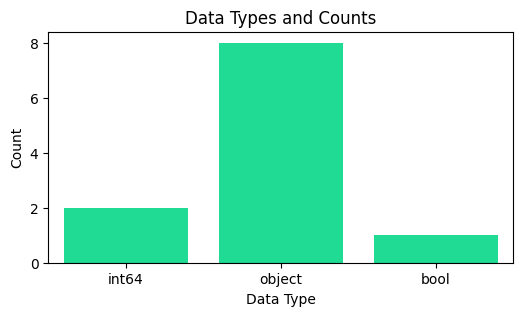

In [8]:
plt.figure(figsize=(6, 3))
sns.countplot(x='Data Type', data=info_table, color='mediumspringgreen')
plt.title('Data Types and Counts')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.show()

According to this diagram the types of each column with raw data are as follows: 
- *intergers:* 2
- *object:* 8
- *boolean:* 1

### Delete column that will not be used
By eliminating these columns the idea is to simplify the data set, eliminating redundant or non-relevant information for the analysis, which can streamline the analysis process and reduce the complexity of your models.

In [9]:
df = df.drop(['published_at', 'updated_at', 'img'], axis=1)
df

,id,year,title,category,nominee,artist,workers,winner
0,1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",True
1,2,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",True
2,3,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",True
3,4,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",True
4,5,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",True
...,...,...,...,...,...,...,...,...
4805,4806,1958,1st Annual GRAMMY Awards (1958),Best Classical Performance - Instrumentalist (...,Tchaikovsky: Piano Concerto No. 1 In B Flat Mi...,None,"Van Cliburn, artist (Symphony Of The Air Orche...",True
4806,4807,1958,1st Annual GRAMMY Awards (1958),Best Classical Performance - Instrumentalist (...,Segovia Golden Jubilee,None,"Andres Segovia, artist",True
4807,4808,1958,1st Annual GRAMMY Awards (1958),Best Classical Performance - Chamber Music (In...,Beethoven: Quartet 130,None,"Hollywood String Quartet (Alvin Dinkin, Paul S...",True
4808,4809,1958,1st Annual GRAMMY Awards (1958),Best Classical Performance - Vocal Soloist (Wi...,Operatic Recital,None,None,True


### Descriptive analysis

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4810.0,2405.500000,1388.671727,1.0,1203.25,2405.5,3607.75,4810.0
year,4810.0,1995.566944,17.149720,1958.0,1983.00,1998.0,2010.00,2019.0


The results are interpreted for the year column since the id cannot give us much information. 
- The year data range from 1958 to 2019, with a mean of approximately 1995.80. This suggests that the data are centered around the 1990s and early 2000s.
- The standard deviation is relatively low (17.05), indicating that the values tend to be closer to the mean.
- The median is close to the mean, suggesting a symmetrical distribution of the data.

In [11]:
# descriptive statistics for categorical variables only
df.describe(include='object').T

,count,unique,top,freq
title,4810,62,62nd Annual GRAMMY Awards (2019),433
category,4810,638,Song Of The Year,70
nominee,4804,4131,Berlioz: Requiem,7
artist,2970,1658,(Various Artists),66
workers,2620,2366,"John Williams, composer (John Williams)",20


These results indicate the distribution and frequency of the data:
- title: There are 4810 titles in total. The most common title is "62nd Annual GRAMMY Awards (2019)" and appears 433 times.
- category: There are 4810 unique entries in the category. "Song Of The Year" is the most common category, with 70 occurrences.
- nominee: There are 4804 unique nominees in total. "Berlioz: Requiem" is the most common nominee, with 7 occurrences.
- artist: 2970 unique artists are found in total. "(Various Artists)" is the most common artist, with 66 occurrences.
- workers: There are 2620 unique workers in total. "John Williams, composer (John Williams)" is the most common worker, with 20 occurrences.

### Check duplicate values

In [12]:
df[df.duplicated(keep=False)]

,id,year,title,category,nominee,artist,workers,winner


We note that there are no duplicate values

### Null values
There are null values in 3 columns 'nominee' 'artists' and 'workers'.

In [13]:
null_nominee = df[df['nominee'].isnull()]
null_nominee

,id,year,title,category,nominee,artist,workers,winner
2282,2262,2000,43rd Annual GRAMMY Awards (2000),"Remixer of the Year, Non-Classical",None,None,None,True
2377,2360,1999,42nd Annual GRAMMY Awards (1999),"Remixer Of The Year, Non-Classical",None,None,None,True
2473,2455,1998,41st Annual GRAMMY Awards (1998),"Remixer Of The Year, Non-classical",None,None,None,True
2569,2548,1997,40th Annual GRAMMY Awards (1997),"Remixer Of The Year, Non-Classical",None,None,None,True
4526,4526,1965,8th Annual GRAMMY Awards (1965),Best New Country & Western Artist,None,None,None,True
4574,4574,1964,7th Annual GRAMMY Awards (1964),Best New Country & Western Artist Of 1964,None,None,None,True


let's remove the null values from nominee since there is no way to analyze this type of data because we do not have any valuable information. 

In [14]:
df.dropna(subset=['nominee'], inplace=True)

In [15]:
null_workers = df[df['workers'].isnull()]
null_workers

,id,year,title,category,nominee,artist,workers,winner
16,183,2019,62nd Annual GRAMMY Awards (2019),Best Latin Jazz Album,Antidote,Chick Corea & The Spanish Heart Band,None,True
25,25,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Billie Eilish,None,None,True
26,26,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Black Pumas,None,None,True
27,27,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Lil Nas X,None,None,True
28,28,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Lizzo,None,None,True
...,...,...,...,...,...,...,...,...
4794,4795,1958,1st Annual GRAMMY Awards (1958),Best Rhythm & Blues Performance,Tequila,The Champs,None,True
4801,4802,1958,1st Annual GRAMMY Awards (1958),"Best Sound Track Album, Dramatic Picture Score...",Gigi,Andre Previn,None,True
4802,4803,1958,1st Annual GRAMMY Awards (1958),"Best Performance, Documentary Or Spoken Word",The Best Of The Stan Freberg Shows,Stan Freberg,None,True
4803,4804,1958,1st Annual GRAMMY Awards (1958),Best Recording For Children,The Chipmunk Song,David Seville And The Chipmunks (Ross Bagdasar...,None,True


In [16]:
null_artist = df[df['artist'].isnull()]
null_artist

,id,year,title,category,nominee,artist,workers,winner
17,17,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Bad Guy,None,"Billie Eilish O'Connell & Finneas O'Connell, s...",True
18,18,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Always Remember Us This Way,None,"Natalie Hemby, Lady Gaga, Hillary Lindsey & Lo...",True
19,19,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Bring My Flowers Now,None,"Brandi Carlile, Phil Hanseroth, Tim Hanseroth ...",True
20,20,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Hard Place,None,"Ruby Amanfu, Sam Ashworth, D. Arcelious Harris...",True
21,21,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Lover,None,"Taylor Swift, songwriter (Taylor Swift)",True
...,...,...,...,...,...,...,...,...
4805,4806,1958,1st Annual GRAMMY Awards (1958),Best Classical Performance - Instrumentalist (...,Tchaikovsky: Piano Concerto No. 1 In B Flat Mi...,None,"Van Cliburn, artist (Symphony Of The Air Orche...",True
4806,4807,1958,1st Annual GRAMMY Awards (1958),Best Classical Performance - Instrumentalist (...,Segovia Golden Jubilee,None,"Andres Segovia, artist",True
4807,4808,1958,1st Annual GRAMMY Awards (1958),Best Classical Performance - Chamber Music (In...,Beethoven: Quartet 130,None,"Hollywood String Quartet (Alvin Dinkin, Paul S...",True
4808,4809,1958,1st Annual GRAMMY Awards (1958),Best Classical Performance - Vocal Soloist (Wi...,Operatic Recital,None,None,True


Let's check the information in the workers and artists column.

In [17]:
print(df['workers'].unique()[:20])

["Finneas O'Connell, producer; Rob Kinelski & Finneas O'Connell, engineers/mixers; John Greenham, mastering engineer"
 'BJ Burton, Brad Cook, Chris Messina & Justin Vernon, producers; BJ Burton, Zach Hanson & Chris Messina, engineers/mixers; Greg Calbi, mastering engineer'
 'Charles Anderson, Tommy Brown, Michael Foster & Victoria Monet, producers; Serban Ghenea, John Hanes, Billy Hickey & Brendan Morawski, engineers/mixers; Randy Merrill, mastering engineer'
 'Rodney “Darkchild” Jerkins, producer; Joseph Hurtado, Jaycen Joshua, Derek Keota & Miki Tsutsumi, engineers/mixers; Colin Leonard, mastering engineer'
 'Disclosure & Denis Kosiak, producers; Ingmar Carlson, Jon Castelli, Josh Deguzman, John Kercy, Denis Kosiak, Guy Lawrence & Michael Romero, engineers/mixers; Dale Becker, mastering engineer'
 'Andrew "VoxGod" Bolooki, Jocelyn “Jozzy” Donald & YoungKio, producers; Andrew "VoxGod" Bolooki, Cinco & Joe Grasso, engineers/mixers; Eric Lagg, mastering engineer'
 'Ricky Reed & Tele, pr

In [18]:
print(df['artist'].unique()[:20])

['Billie Eilish' 'Bon Iver' 'Ariana Grande' 'H.E.R.' 'Khalid'
 'Lil Nas X Featuring Billy Ray Cyrus' 'Lizzo' 'Post Malone & Swae Lee'
 'Lana Del Rey' 'Lil Nas X' 'Vampire Weekend'
 'Chick Corea & The Spanish Heart Band' None 'Beyoncé' 'Taylor Swift'
 'Ariana Grande & Social House' 'Jonas Brothers'
 'Shawn Mendes & Camila Cabello' 'Elvis Costello & The Imposters'
 'Andrea Bocelli']


After analyzing the information in the data, a pattern was identified in the workers column, where some columns have information that we assume and suppose that it is about the artist located between brackets, then this could be a way to complete the null values in the artist column, and for the case of the nulls in the workers column, the information that serves to fill the nulls is the artist, since we assume that these columns are related and thus find a way for one column to complement the other and not simply eliminate all the null values. 

Then we are going to use regular expressions to parse and manipulate the text patterns, in this case for the process of the artist column being filled with the values from workers

In [19]:
patterns = [r'composer \((.*?)\)', 
            r'\(.*\)',
            r'songwriters? \((.*?)\)']

def find_artist(workers):
    for pattern in patterns:
        matches = re.findall(pattern, workers)
        if matches:
            return matches[0] if matches[0] else None
    return None

condition = df['artist'].isnull() & df['workers'].str.contains('|'.join(patterns))

# Applying the condition and filling the 'artist' field with values from 'workers'
df.loc[condition, 'artist'] = df.loc[condition, 'workers'].apply(lambda x: find_artist(x) if isinstance(x, str) else None)
df.isnull().sum()

C:\Users\manue\AppData\Local\Temp\ipykernel_4452\2391395186.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  condition = df['artist'].isnull() & df['workers'].str.contains('|'.join(patterns))


id             0
year           0
title          0
category       0
nominee        0
artist       468
workers     2184
winner         0
dtype: int64

process that the workers column is filled with the artist's values.


In [20]:
validation = (df['artist'].notnull()) & (df['workers'].isnull())

# Applying the condition and filling 'workers' with values from 'artist'
df.loc[validation, 'workers'] = df.loc[validation, 'artist'].apply(lambda x: x if isinstance(x, str) else None)
df.isnull().sum()

id            0
year          0
title         0
category      0
nominee       0
artist      468
workers     180
winner        0
dtype: int64

Here we eliminate the remaining null values

In [21]:
df.dropna(subset=['artist', 'workers'], inplace=True)

In [22]:
data_info = {
    'Column Name': list(df.columns),
    'Null Values': list(df.isnull().sum()),
    'Unique Values': list(df.nunique())
}

info_table = pd.DataFrame(data_info)
print(info_table)

  Column Name  Null Values  Unique Values
0          id            0           4336
1        year            0             62
2       title            0             62
3    category            0            569
4     nominee            0           3773
5      artist            0           2510
6     workers            0           3371
7      winner            0              1


Finally, we verified that there were no null values and also observed that the number of unique values increased. 

### Colum year


In [23]:
df['year'].min(), df['year'].max()

(1958, 2019)

We look at the years in the dataset and see that we have information from 1958 to 2019.

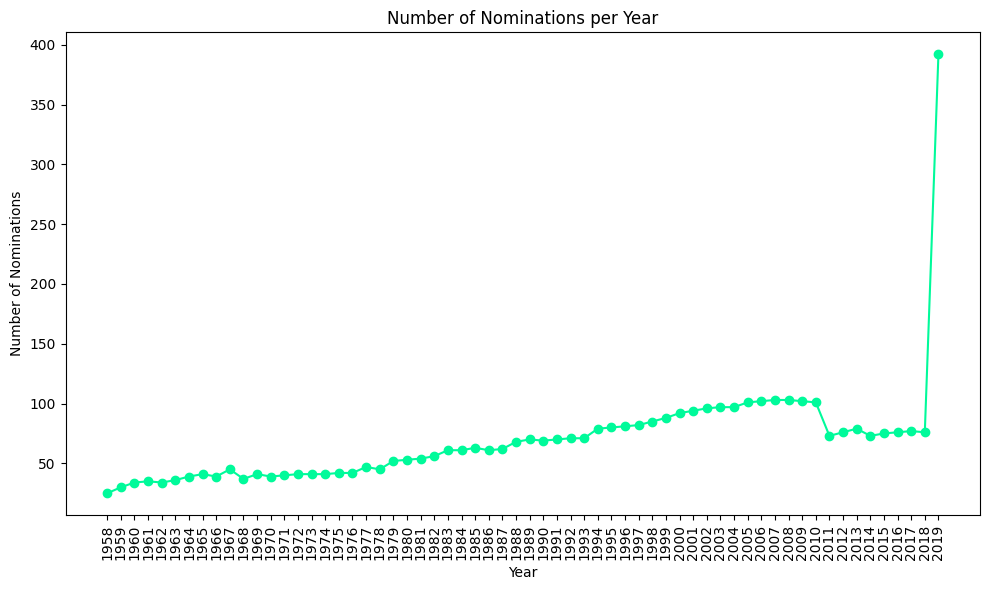

In [24]:
nominations_year = df.groupby('year').size()

plt.figure(figsize=(10, 6))
plt.plot(nominations_year.index, nominations_year.values, marker='o', linestyle='-', color='mediumspringgreen')
plt.title('Number of Nominations per Year')
plt.xlabel('Year')
plt.ylabel('Number of Nominations')
plt.grid(False)
plt.xticks(nominations_year.index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- The number of nominations increased between 1958 and 2019.
- The general trend is an increase in the number of nominations.

It is clear that the graph shows an increasing trend but has a decrease between 2010 and 2018, but what is most significant is the large increase in 2019, which could be due to the fact that music has become more diverse in recent decades and has also experienced significant growth in recent decades. This has led to a greater number of musical genres and styles represented at the Grammys, which in turn has increased the number of nominations.

### Column title

In [25]:
df['title'].unique()

array(['62nd Annual GRAMMY Awards  (2019)',
       '43rd Annual GRAMMY Awards  (2000)',
       '38th Annual GRAMMY Awards  (1995)',
       '61st Annual GRAMMY Awards  (2018)',
       '31st Annual GRAMMY Awards  (1988)',
       '60th Annual GRAMMY Awards  (2017)',
       '59th Annual GRAMMY Awards  (2016)',
       '58th Annual GRAMMY Awards  (2015)',
       '34th Annual GRAMMY Awards  (1991)',
       '33rd Annual GRAMMY Awards  (1990)',
       '57th Annual GRAMMY Awards  (2014)',
       '56th Annual GRAMMY Awards  (2013)',
       '55th Annual GRAMMY Awards  (2012)',
       '47th Annual GRAMMY Awards  (2004)',
       '32nd Annual GRAMMY Awards  (1989)',
       '54th Annual GRAMMY Awards  (2011)',
       '53rd Annual GRAMMY Awards  (2010)',
       '51st Annual GRAMMY Awards  (2008)',
       '52nd Annual GRAMMY Awards  (2009)',
       '16th Annual GRAMMY Awards  (1973)',
       '45th Annual GRAMMY Awards  (2002)',
       '50th Annual GRAMMY Awards  (2007)',
       '12th Annual GRAMMY Award

In [26]:
df['title'].nunique()

62

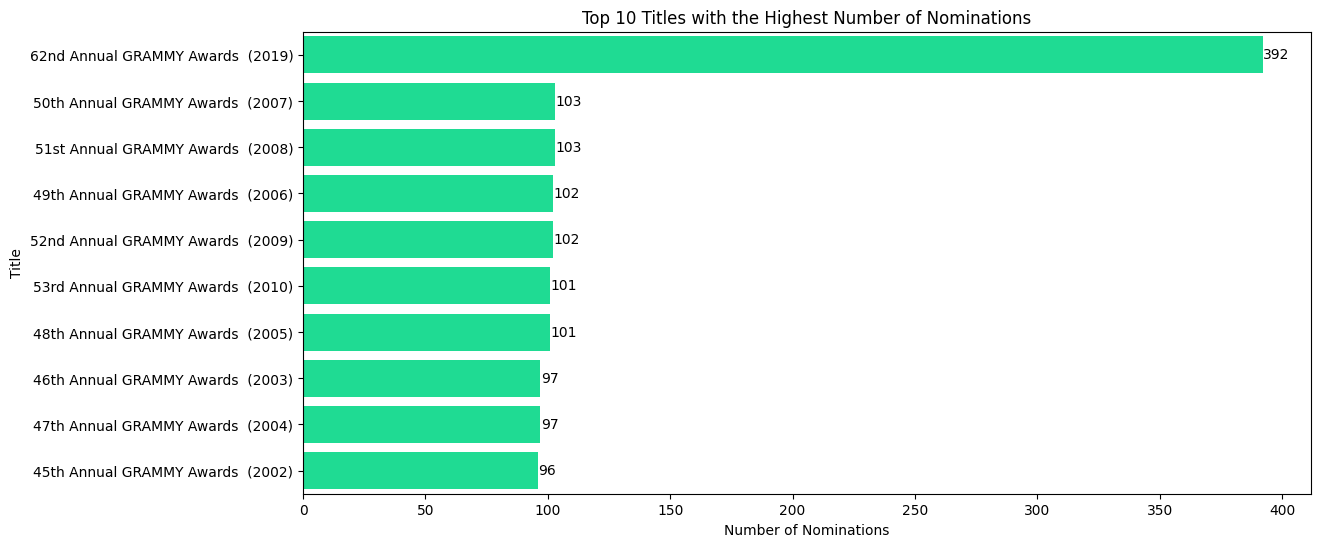

In [27]:
nominations_count = df['title'].value_counts().head(10)

plt.figure(figsize=(13, 6))
sns.barplot(x=nominations_count.values, y=nominations_count.index, color='mediumspringgreen')

for i, v in enumerate(nominations_count.values):
    plt.text(v + 0.2, i, str(v), color='black', va='center')

plt.xlabel('Number of Nominations')
plt.ylabel('Title')
plt.title('Top 10 Titles with the Highest Number of Nominations')
plt.show()

It is evident that the title 62nd which corresponds to the year 2019 has a fairly large increase in terms of nominations compared to other years, then I searched the internet the 2019 grammys and see if it is possible to find a reason why it is the title with more nominations, and I found that the number of the title is wrong and the 2019 grammys are the number 61st and the title 62nd corresponds to 2020 according to what I found. Then I looked for different titles and I realized that the year is wrong, but I looked in the official page of the grammys and there the information was correct, that is to say, it coincides exactly as in the dataset. Then I realized some very important information the 1st and 2nd Grammy Awards ceremony were held in the same year in 1959 (I quote the information) "The first thing you should know about the 2nd Annual GRAMMY Awards is that they weren't actually "annual" at all. In fact, this awards presentation marked the only time in GRAMMY history that two awards presentations were ever made in one year, with both the 1st and 2nd GRAMMYs falling in 1959. Call it a slightly embarrassing case of premature validation" (Grammy Awards, n.d.). 

*The link to this information is in the references.*

But finally I did not find the reason for this increase, so we suppose that it is due to the popularity that has been reaching the different musical styles, involving different cultures, rhythms and lyrics, or that there are many artists who have reached a high level of popularity and this makes more nominations are generated. 

### Column category

In [28]:
df['category'].nunique()

569

After checking how many categories there are, let's see what are the 10 most frequent categories

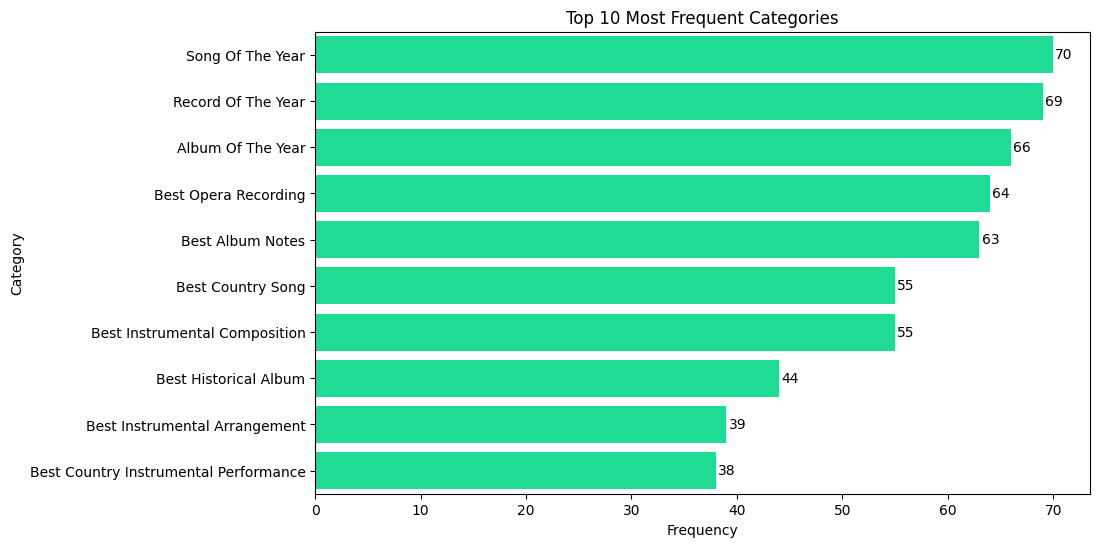

In [29]:
category_frequency = df['category'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_frequency.values, y=category_frequency.index, color='mediumspringgreen')

for i, v in enumerate(category_frequency.values):
    plt.text(v + 0.2, i, str(v), color='black', va='center')

plt.xlabel('Frequency')
plt.ylabel('Category')
plt.title('Top 10 Most Frequent Categories')
plt.show()

The most frequent categories at the Grammy Awards are those that encompass popular genres, are considered the most important and have had a significant cultural impact. On the other hand, other categories with high frequency focus on specific genres or aspects of music, rewarding quality in particular areas of music production. 

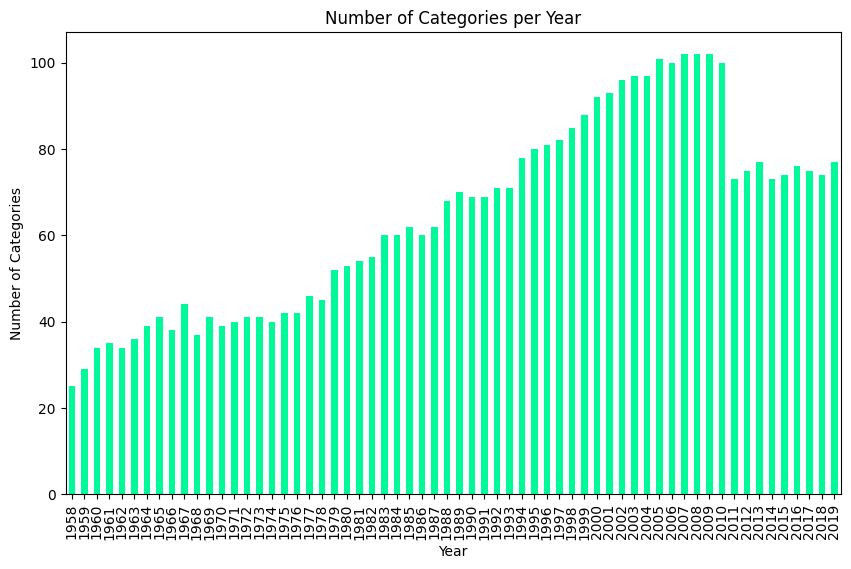

In [30]:
categories_year = df.groupby('year')['category'].nunique()

plt.figure(figsize=(10, 6))
categories_year.plot(kind='bar', color='mediumspringgreen')
plt.xlabel('Year')
plt.ylabel('Number of Categories')
plt.title('Number of Categories per Year')
plt.show()

The increase in the number of categories at the Grammy Awards is due to several key factors. It reflects the increasing diversification of popular music, adapting to new genres and emerging subgenres, and is related to the expansion of the music market, which allows more artists to be honored and attract a wider audience. And about the minimization of categories between 2010 and 2019, maybe it is due to internal processes of the organization.


### Columns nominee

We check some data in this column

In [31]:
print(df['nominee'].unique()[:50])

['Bad Guy' 'Hey, Ma' '7 rings' 'Hard Place' 'Talk' 'Old Town Road'
 'Truth Hurts' 'Sunflower' 'When We All Fall Asleep, Where Do We Go?'
 'I,I' 'Norman F***ing Rockwell!' 'thank u, next' 'I Used To Know Her' '7'
 'Cuz I Love You (Deluxe)' 'Father Of The Bride' 'Antidote'
 'Always Remember Us This Way' 'Bring My Flowers Now' 'Lover'
 'Norman F***ing Rockwell' 'Someone You Loved' 'Spirit'
 'You Need To Calm Down' 'Boyfriend' 'Sucker' 'Señorita' 'Look Now' 'Sì'
 'Love (Deluxe Edition)' 'A Legendary Christmas' 'Walls'
 'The Lion King: The Gift' 'No.6 Collaborations Project' 'Got To Keep On'
 'Linked' 'Piece Of Your Heart' 'Underwater' 'Midnight Hour'
 'No Geography' 'LP5' 'Hi This Is Flume (Mixtape)' 'SOLACE' 'Weather'
 'Mettavolution' 'Ancestral Recall' '1963: New Directions'
 'Star People Nation' 'Beat Music! Beat Music! Beat Music!' 'Elevate']


In [32]:
nominations_song = df['nominee'].value_counts().head(10)

nominations_table = pd.DataFrame({'Song': nominations_song.index,
                                  'Number of Nominations': nominations_song.values})

print(nominations_table)

                          Song  Number of Nominations
0   Bridge Over Troubled Water                      7
1             Berlioz: Requiem                      6
2              Up, Up And Away                      6
3            Gentle On My Mind                      5
4                 Need You Now                      5
5             A Taste Of Honey                      5
6             King Of The Road                      5
7              West Side Story                      5
8                    Blackstar                      5
9  Mahler: Symphony No. 9 In D                      4


These songs could have had a great impact or are very good and popular songs, due to their musical composition, lyrics, vocal performance and production.


### Column artist

Let's start by seeing what information is inside the column

In [33]:
print(df['artist'].unique()[:50])

['Billie Eilish' 'Bon Iver' 'Ariana Grande' 'H.E.R.' 'Khalid'
 'Lil Nas X Featuring Billy Ray Cyrus' 'Lizzo' 'Post Malone & Swae Lee'
 'Lana Del Rey' 'Lil Nas X' 'Vampire Weekend'
 'Chick Corea & The Spanish Heart Band' '(Billie Eilish)' '(Lady Gaga)'
 '(Tanya Tucker)' '(H.E.R.)' '(Taylor Swift)' '(Lana Del Rey)'
 '(Lewis Capaldi)' '(Lizzo)' 'Beyoncé' 'Taylor Swift'
 'Ariana Grande & Social House' 'Jonas Brothers'
 'Shawn Mendes & Camila Cabello' 'Elvis Costello & The Imposters'
 'Andrea Bocelli' 'Michael Bublé' 'John Legend' 'Barbra Streisand'
 'Ed Sheeran' 'The Chemical Brothers' 'Bonobo' 'Meduza Featuring Goodboys'
 'RÜFÜS DU SOL' 'Skrillex, Boys Noize & Ty Dolla $ign' 'Apparat' 'Flume'
 'Tycho Featuring Saint Sinner' 'Rodrigo y Gabriela'
 'Christian Scott aTunde Adjuah' '(John Coltrane)' 'Theo Croker'
 'Mark Guiliana' 'Lettuce' 'Gary Clark Jr.' 'Bones UK' 'Brittany Howard'
 'Karen O & Danger Mouse' 'Rival Sons']


We identified that there are artist names between parentheses, this is due to the process that was done with the null values. Then we test with any artist what information there is in the rows that have the name between parenthesis and those that do not have parenthesis. 

In [34]:
artists_data = df[df['artist'] == '(Billie Eilish)']
artists_data

,id,year,title,category,nominee,artist,workers,winner
17,17,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Bad Guy,(Billie Eilish),"Billie Eilish O'Connell & Finneas O'Connell, s...",True
357,353,2019,62nd Annual GRAMMY Awards (2019),"Best Engineered Album, Non-Classical","When We All Fall Asleep, Where Do We Go?",(Billie Eilish),"Rob Kinelski & Finneas O'Connell, engineers; J...",True


In [35]:
artists_data = df[df['artist'] == 'Billie Eilish']
artists_data

,id,year,title,category,nominee,artist,workers,winner
0,1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",True
8,9,2019,62nd Annual GRAMMY Awards (2019),Album Of The Year,"When We All Fall Asleep, Where Do We Go?",Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",True
35,35,2019,62nd Annual GRAMMY Awards (2019),Best Pop Solo Performance,Bad Guy,Billie Eilish,Billie Eilish,True
49,48,2019,62nd Annual GRAMMY Awards (2019),Best Pop Vocal Album,"When We All Fall Asleep, Where Do We Go?",Billie Eilish,Billie Eilish,True


We see that they are stored as if they were different artists and this could be detrimental to the analysis. So we will do the procedure to remove this parenthesis using regular expressions.

In [36]:
df['artist'] = df['artist'].str.replace(r'\((.*?)\)', r'\1', regex=True)

In [37]:
print(df['artist'].unique()[:50])

['Billie Eilish' 'Bon Iver' 'Ariana Grande' 'H.E.R.' 'Khalid'
 'Lil Nas X Featuring Billy Ray Cyrus' 'Lizzo' 'Post Malone & Swae Lee'
 'Lana Del Rey' 'Lil Nas X' 'Vampire Weekend'
 'Chick Corea & The Spanish Heart Band' 'Lady Gaga' 'Tanya Tucker'
 'Taylor Swift' 'Lewis Capaldi' 'Beyoncé' 'Ariana Grande & Social House'
 'Jonas Brothers' 'Shawn Mendes & Camila Cabello'
 'Elvis Costello & The Imposters' 'Andrea Bocelli' 'Michael Bublé'
 'John Legend' 'Barbra Streisand' 'Ed Sheeran' 'The Chemical Brothers'
 'Bonobo' 'Meduza Featuring Goodboys' 'RÜFÜS DU SOL'
 'Skrillex, Boys Noize & Ty Dolla $ign' 'Apparat' 'Flume'
 'Tycho Featuring Saint Sinner' 'Rodrigo y Gabriela'
 'Christian Scott aTunde Adjuah' 'John Coltrane' 'Theo Croker'
 'Mark Guiliana' 'Lettuce' 'Gary Clark Jr.' 'Bones UK' 'Brittany Howard'
 'Karen O & Danger Mouse' 'Rival Sons' 'Tool'
 'Candlemass Featuring Tony Iommi' 'Death Angel' 'I Prevail'
 'Killswitch Engage']


In [38]:
artists_data = df[df['artist'] == 'Billie Eilish']
artists_data

,id,year,title,category,nominee,artist,workers,winner
0,1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",True
8,9,2019,62nd Annual GRAMMY Awards (2019),Album Of The Year,"When We All Fall Asleep, Where Do We Go?",Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",True
17,17,2019,62nd Annual GRAMMY Awards (2019),Song Of The Year,Bad Guy,Billie Eilish,"Billie Eilish O'Connell & Finneas O'Connell, s...",True
35,35,2019,62nd Annual GRAMMY Awards (2019),Best Pop Solo Performance,Bad Guy,Billie Eilish,Billie Eilish,True
49,48,2019,62nd Annual GRAMMY Awards (2019),Best Pop Vocal Album,"When We All Fall Asleep, Where Do We Go?",Billie Eilish,Billie Eilish,True
357,353,2019,62nd Annual GRAMMY Awards (2019),"Best Engineered Album, Non-Classical","When We All Fall Asleep, Where Do We Go?",Billie Eilish,"Rob Kinelski & Finneas O'Connell, engineers; J...",True


Now we verify that there are no artists in parenthesis and we check again with the previous artist and see that the process worked. 

In [39]:
df['artist'].nunique()

2242

After this process we went from having 2510 artists to 2242.

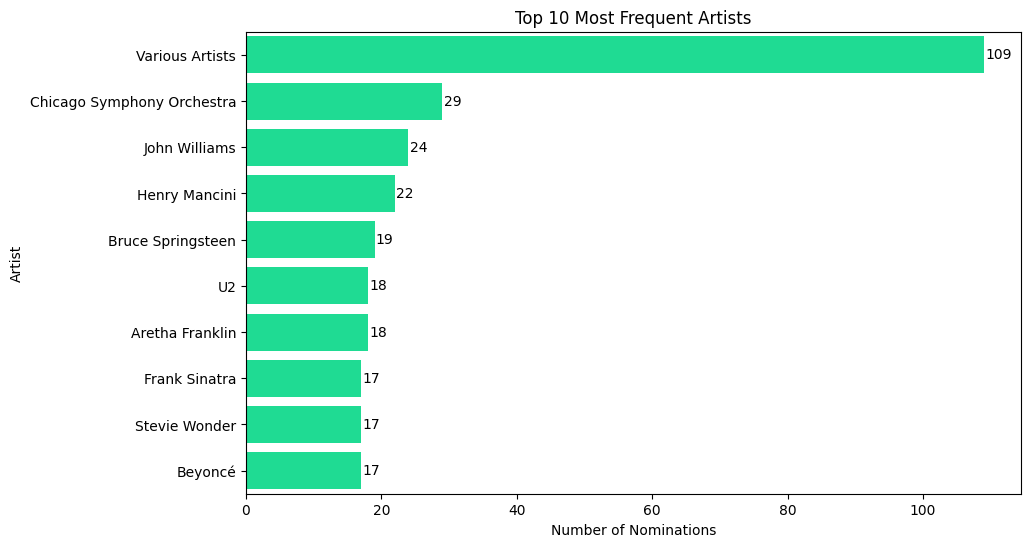

In [40]:
frequent_artists = df['artist'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=frequent_artists.values, y=frequent_artists.index, color='mediumspringgreen')

for i, v in enumerate(frequent_artists.values):
    plt.text(v + 0.2, i, str(v), color='black', va='center')

plt.xlabel('Number of Nominations')
plt.ylabel('Artist')
plt.title('Top 10 Most Frequent Artists')
plt.show()

The chart provides valuable information about the artists who have had the most success at these awards or those who have had a significant impact on the music industry throughout their careers. It also reflects the diversity of musical genres that are recognized at the Grammys.

In [41]:
various_artists_data = df[df['artist'] == 'Various Artists']
various_artists_data

,id,year,title,category,nominee,artist,workers,winner
214,212,2019,62nd Annual GRAMMY Awards (2019),Best Roots Gospel Album,"Gonna Sing, Gonna Shout",Various Artists,"Jerry Salley, Producer",True
276,272,2019,62nd Annual GRAMMY Awards (2019),Best Regional Roots Music Album,Hawaiian Lullaby,Various Artists,"Imua Garza & Kimié Miner, producers",True
293,289,2019,62nd Annual GRAMMY Awards (2019),"Best Spoken Word Album (Includes Poetry, Audio...",Beastie Boys Book,Various Artists,"Michael Diamond, Adam Horovitz, Scott Sherratt...",True
308,304,2019,62nd Annual GRAMMY Awards (2019),Best Compilation Soundtrack For Visual Media,The Lion King: The Songs,Various Artists,"Jon Favreau & Hans Zimmer, compilation producers",True
309,305,2019,62nd Annual GRAMMY Awards (2019),Best Compilation Soundtrack For Visual Media,Quentin Tarantino's Once Upon A Time In Hollywood,Various Artists,"Quentin Tarantino, compilation producer; Mary ...",True
...,...,...,...,...,...,...,...,...
3923,3916,1978,21st Annual GRAMMY Awards (1978),Best Cast Show Album,Ain't Misbehavin',Various Artists,"Thomas Z. Shepard, producer (Various Artists)",True
3981,3975,1977,20th Annual GRAMMY Awards (1977),Best Recording For Children,Aren't You Glad You're You,Various Artists,(Various Artists),True
4006,3999,1976,19th Annual GRAMMY Awards (1976),Best Album Notes,The Changing Face Of Harlem - The Savoy Sessions,Various Artists,"Dan Morgenstern, album notes writer (Various A...",True
4035,4028,1976,19th Annual GRAMMY Awards (1976),Album Of Best Original Score Written For A Mot...,Car Wash,Various Artists,"Norman Whitfield, composer (Various Artists)",True


We check which rows correspond to 'Various Artists' and we realize that these correspond to the data that were completed in the null values process, as we can see that they correspond to the information in the workers column

### Column winner

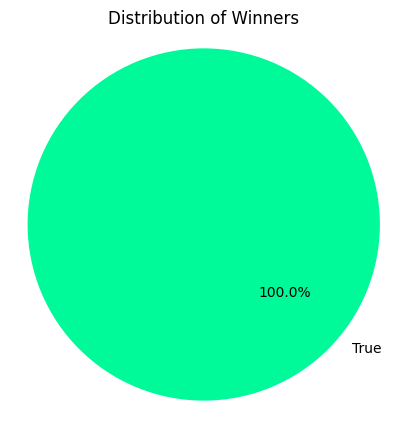

In [42]:
winners_count = df['winner'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(winners_count, labels=winners_count.index, autopct='%1.1f%%', startangle=140, colors=['mediumspringgreen'])
plt.title('Distribution of Winners')
plt.axis('equal') 
plt.show()

This graph shows that all nominees were winners, I think it would make much more sense to rename this column nominee, this with the objective of the work to be done in the future and rename this column would allow a better result.

In [43]:
df.rename(columns={'winner': 'nominated'}, inplace=True)
df.head(5)

,id,year,title,category,nominee,artist,workers,nominated
0,1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",True
1,2,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",True
2,3,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",True
3,4,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",True
4,5,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",True


# References


1. 2nd Annual GRAMMY Awards | GRAMMY.com. (s. f.). https://www.grammy.com/awards/2nd-annual-grammy-awards 

2. Grammy Awards. (2020, 16 septiembre). Kaggle. https://www.kaggle.com/datasets/unanimad/grammy-awards 

3. Maina, S. (2022, 9 noviembre). Regular Expressions (Regex) with Examples in Python and Pandas. Medium. https://towardsdatascience.com/regular-expressions-regex-with-examples-in-python-and-pandas-461228335670 

4. Pandas DataFrame describe() Method. (s. f.). https://www.w3schools.com/python/pandas/ref_df_describe.asp 

5. Python RegEx. (s. f.). https://www.w3schools.com/python/python_regex.asp 

6. Spotify Tracks Dataset. (2022, 22 octubre). Kaggle. https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset 
